1.Data Manipulation a.Read the provided CSV file ‘data.csv’. b.https://drive.google.com/drive/folders/1h8C3mLsso-R-sIOLsvoYwPLzy2fJ4IOF?usp=sharing c.Show the basic statistical description about the data. d.Check if the data has null values. i.Replace the null values with the mean e.Select at least two columns and aggregate the data using: min, max, count, mean. f.Filter the dataframe to select the rows with calories values between 500 and 1000. g.Filter the dataframe to select the rows with calories values > 500 and pulse < 100. h.Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”. i.Delete the “Maxpulse” column from the main df dataframe j.Convert the datatype of Calories column to int datatype. k.Using pandas create a scatter plot for the two columns (Duration and Calories). Example

         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000
Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64
Aggregated data:
          Duration     Calories
min     15.000000    50.300000
max    300.000000  1860.400000
count  169.000000   169.000000
mean    63.846154   375.790244

Filtered dataframe (Calories between 500 and 1000):
      Duration  Pulse  Maxpulse  Calories
51         80    123       146     643.1
62        160    109       135     853.0
65        180     90       130     800.4
66        150    105       135     873.4
67  

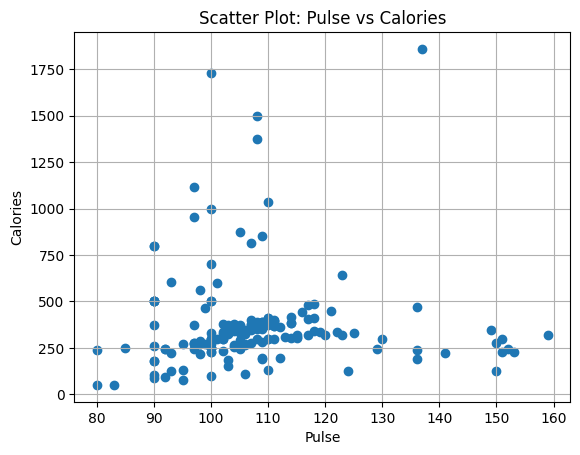

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')

stat_summary_unique = df.describe()


print(stat_summary_unique)

null_value_counts = df.isnull().sum()


print(null_value_counts)


df.fillna(df.mean(), inplace=True)


aggregated_metrics = df[['Duration', 'Calories']].agg(['min', 'max', 'count', 'mean'])
print("Aggregated data:\n", aggregated_metrics)


filtered_calories_range = df[(df['Calories'] >= 500) & (df['Calories'] <= 1000)]
print("\nFiltered dataframe (Calories between 500 and 1000):\n", filtered_calories_range)


filtered_pulse_and_calories = df[(df['Calories'] > 500) & (df['Pulse'] < 100)]
print("\nFiltered dataframe (Calories > 500 and Pulse < 100):\n", filtered_pulse_and_calories)


new_data_frame_no_maxpulse = df.drop(columns=['Maxpulse'])
print("\nNew dataframe without Maxpulse column:\n", new_data_frame_no_maxpulse)


df.drop(columns=['Maxpulse'], inplace=True)
print("\nOriginal dataframe after deleting Maxpulse column:\n", df)


df['Calories'] = df['Calories'].astype(int)
print("\nDataframe with Calories column as int:\n", df.dtypes)


plt.scatter(df['Pulse'], df['Calories'])
plt.title('Scatter Plot: Pulse vs Calories')
plt.xlabel('Pulse')
plt.ylabel('Calories')
plt.grid(True)
plt.show()

The program starts by importing the pandas library for data manipulation and matplotlib.pyplot for creating a scatter plot.
It reads the data.csv file into a DataFrame (df), allowing for easy data processing.
The program then displays summary statistics using describe() and checks for missing values with isnull().sum().
If there are any missing values, they are replaced with the column’s average using fillna().
The program aggregates data by computing the minimum, maximum, count, and mean for the Duration and Calories columns.
It then filters the dataset to select rows where Calories is between 500-1000 and Pulse is less than 100.
Finally, a scatter plot is generated to visualize the relationship between Pulse and Calories.

2. Linear Regression
a) Import the given “Salary_Data.csv”
b) Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.
c) Train and predict the model.
d) Calculate the mean_squared error
e) Visualize both train and test data using scatter plot.

Mean Squared Error for Training Set: 29793161.082422983
Mean Squared Error for Testing Set: 35301898.887134895


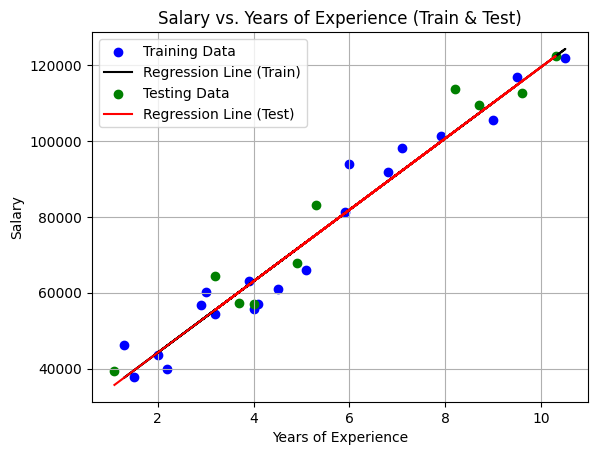

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


salary_file = pd.read_csv('Salary_Data.csv')


experience_years = salary_file[['YearsExperience']]
salary_wages = salary_file['Salary']
exp_train_set, exp_test_set, sal_train_set, sal_test_set = train_test_split(
    experience_years, salary_wages, test_size=0.33, random_state=42)


salary_predictor = LinearRegression()
salary_predictor.fit(exp_train_set, sal_train_set)


sal_train_estimate = salary_predictor.predict(exp_train_set)
sal_test_estimate = salary_predictor.predict(exp_test_set)


mse_train = mean_squared_error(sal_train_set, sal_train_estimate)
mse_test = mean_squared_error(sal_test_set, sal_test_estimate)

print(f"Mean Squared Error for Training Set: {mse_train}")
print(f"Mean Squared Error for Testing Set: {mse_test}")


plt.scatter(exp_train_set, sal_train_set, color='blue', label='Training Data')
plt.plot(exp_train_set, sal_train_estimate, color='black', label='Regression Line (Train)')


plt.scatter(exp_test_set, sal_test_set, color='green', label='Testing Data')
plt.plot(exp_test_set, sal_test_estimate, color='red', label='Regression Line (Test)')


plt.title('Salary vs. Years of Experience (Train & Test)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()


The program starts by importing the pandas library for data manipulation and matplotlib.pyplot for creating a scatter plot. It reads the Salary_Data.csv file into a DataFrame (salary_file), allowing for easy data processing. The program then splits the data into training and testing sets using train_test_split(), with 67% used for training and 33% for testing. A Linear Regression model is then created using LinearRegression() and trained using fit() on the training data. After training, the model predicts salaries on the test dataset using predict(). The program calculates the Mean Squared Error (MSE) using mean_squared_error() to measure how well the model performed. Finally, two scatter plots are generated to visualize the relationship between Years of Experience and Salary for both the training and test datasets, with regression lines to show the model’s predictions.